In [ ]:
from google.colab import drive
from google.colab.patches import cv2_imshow
import cv2 as cv
import torch
import os
from tqdm import tqdm
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.8/882.8 kB 43.8 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Training on {device}')

model = YOLO('yolov8n.pt').to(device)

Training on cuda


100%|██████████| 6.25M/6.25M [00:00<00:00, 268MB/s]


In [ ]:
model.info(True)

layer                                     name  gradient   parameters                shape         mu      sigma
    0                      model.0.conv.weight     False          432        [16, 3, 3, 3]   -0.00279      0.152 torch.float32
    1                        model.0.bn.weight     False           16                 [16]       2.97       1.86 torch.float32
    2                          model.0.bn.bias     False           16                 [16]      0.249       4.17 torch.float32
    3                      model.1.conv.weight     False         4608       [32, 16, 3, 3]   -0.00012      0.063 torch.float32
    4                        model.1.bn.weight     False           32                 [32]       5.02       1.12 torch.float32
    5                          model.1.bn.bias     False           32                 [32]      0.942        1.5 torch.float32
    6                  model.2.cv1.conv.weight     False         1024       [32, 32, 1, 1]     -0.011     0.0906 torch.float3

(225, 3157200, 0, 8.8575488)

In [ ]:
for name, param in model.named_parameters():
        if 'model.22' not in name:  # Assuming the detect module is model.22
            param.requires_grad = False
        else:
            print(f"Training: {name}")

Training: model.model.22.cv2.0.0.conv.weight
Training: model.model.22.cv2.0.0.bn.weight
Training: model.model.22.cv2.0.0.bn.bias
Training: model.model.22.cv2.0.1.conv.weight
Training: model.model.22.cv2.0.1.bn.weight
Training: model.model.22.cv2.0.1.bn.bias
Training: model.model.22.cv2.0.2.weight
Training: model.model.22.cv2.0.2.bias
Training: model.model.22.cv2.1.0.conv.weight
Training: model.model.22.cv2.1.0.bn.weight
Training: model.model.22.cv2.1.0.bn.bias
Training: model.model.22.cv2.1.1.conv.weight
Training: model.model.22.cv2.1.1.bn.weight
Training: model.model.22.cv2.1.1.bn.bias
Training: model.model.22.cv2.1.2.weight
Training: model.model.22.cv2.1.2.bias
Training: model.model.22.cv2.2.0.conv.weight
Training: model.model.22.cv2.2.0.bn.weight
Training: model.model.22.cv2.2.0.bn.bias
Training: model.model.22.cv2.2.1.conv.weight
Training: model.model.22.cv2.2.1.bn.weight
Training: model.model.22.cv2.2.1.bn.bias
Training: model.model.22.cv2.2.2.weight
Training: model.model.22.cv2.2

In [ ]:
model.info(True)

layer                                     name  gradient   parameters                shape         mu      sigma
    0                      model.0.conv.weight     False          432        [16, 3, 3, 3]   -0.00279      0.152 torch.float32
    1                        model.0.bn.weight     False           16                 [16]       2.97       1.86 torch.float32
    2                          model.0.bn.bias     False           16                 [16]      0.249       4.17 torch.float32
    3                      model.1.conv.weight     False         4608       [32, 16, 3, 3]   -0.00012      0.063 torch.float32
    4                        model.1.bn.weight     False           32                 [32]       5.02       1.12 torch.float32
    5                          model.1.bn.bias     False           32                 [32]      0.942        1.5 torch.float32
    6                  model.2.cv1.conv.weight     False         1024       [32, 32, 1, 1]     -0.011     0.0906 torch.float3

(225, 3157200, 0, 8.8575488)

In [39]:
results = model.train(data='/content/drive/MyDrive/YOLO_detection/weapon_data/data.yaml',
        epochs= 120,
        imgsz=512,
        batch=32,
        name='train_detect_module',
        freeze=[f'model.{i}' for i in range(22)],
        augment=True,
        visualize=True,
        single_cls = True)

Ultralytics 8.3.5 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/YOLO_detection/weapon_data/data.yaml, epochs=120, time=None, patience=100, batch=32, imgsz=512, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=None, name=train_detect_module8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=True, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=['model.0', 'model.1', 'model.2', 'model.3', 'model.4', 'model.5', 'model.6', 'model.7', 'model.8', 'model.9', 'model.10', 'model.11', 'model.12', 'model.13', 'model.14', 'model.15', 'model.16', 'model.17', 'model.18', 'model.19', 'model.20', 'model.21'], multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=Fa

train: Scanning /content/drive/MyDrive/YOLO_detection/weapon_data/labels/train.cache... 78 images, 0 backgrounds, 0 corrupt: 100%|██████████| 78/78 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/YOLO_detection/weapon_data/labels/val.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]


Plotting labels to runs/detect/train_detect_module8/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.0005), 69 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 512 train, 512 val
Using 2 dataloader workers
Logging results to runs/detect/train_detect_module8
Starting training for 120 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/120      2.78G      1.207     0.8229     0.9901         25        512: 100%|██████████| 3/3 [00:02<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.39it/s]

                   all         10         10      0.866        0.7      0.769      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/120       2.7G      1.296     0.8584     0.9823         32        512: 100%|██████████| 3/3 [00:00<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.94it/s]


                   all         10         10      0.868        0.7      0.773      0.478

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/120      2.69G      1.207     0.7859     0.9741         25        512: 100%|██████████| 3/3 [00:00<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.26it/s]

                   all         10         10      0.869        0.7      0.744      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/120      2.69G      1.045     0.7015     0.9288         29        512: 100%|██████████| 3/3 [00:00<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.22it/s]

                   all         10         10      0.835        0.6      0.745      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/120      2.69G     0.8712     0.6291     0.9322         24        512: 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.72it/s]

                   all         10         10      0.812        0.6      0.688      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/120      2.69G      1.018     0.7109     0.9573         30        512: 100%|██████████| 3/3 [00:01<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.33it/s]

                   all         10         10      0.793        0.6      0.715      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/120      2.69G     0.9126     0.6428     0.9292         37        512: 100%|██████████| 3/3 [00:01<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.34it/s]

                   all         10         10      0.669        0.5      0.543       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/120      2.69G      0.926     0.6308     0.8733         28        512: 100%|██████████| 3/3 [00:00<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]

                   all         10         10      0.593        0.6      0.538      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/120      2.69G     0.8755     0.5974     0.9209         25        512: 100%|██████████| 3/3 [00:01<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.91it/s]

                   all         10         10      0.945        0.6      0.752      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/120      2.69G     0.9504     0.6159     0.9191         34        512: 100%|██████████| 3/3 [00:00<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.33it/s]

                   all         10         10          1      0.663      0.778      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/120      2.69G     0.8639     0.5791     0.9041         31        512: 100%|██████████| 3/3 [00:00<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.20it/s]


                   all         10         10      0.843        0.7      0.775      0.462

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/120      2.69G     0.9645     0.6534     0.9292         24        512: 100%|██████████| 3/3 [00:00<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.85it/s]

                   all         10         10      0.798        0.8      0.787      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/120      2.69G     0.9183     0.5671      0.928         34        512: 100%|██████████| 3/3 [00:00<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.77it/s]

                   all         10         10      0.793       0.77      0.796      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/120      2.69G     0.8415     0.5489     0.8755         34        512: 100%|██████████| 3/3 [00:00<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.46it/s]

                   all         10         10      0.867        0.7      0.783      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/120      2.69G     0.8676     0.5834     0.8689         29        512: 100%|██████████| 3/3 [00:00<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.61it/s]

                   all         10         10      0.798      0.792      0.789       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/120      2.69G      1.037     0.6728     0.9002         28        512: 100%|██████████| 3/3 [00:00<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.38it/s]


                   all         10         10      0.874      0.692      0.721      0.424

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/120      2.69G     0.8595     0.6006     0.8695         28        512: 100%|██████████| 3/3 [00:01<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]

                   all         10         10      0.798      0.789      0.781      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/120      2.69G     0.8949     0.6083     0.9098         26        512: 100%|██████████| 3/3 [00:01<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]

                   all         10         10      0.873      0.691      0.769      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/120      2.69G     0.9006     0.5797     0.8836         27        512: 100%|██████████| 3/3 [00:00<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.51it/s]

                   all         10         10      0.858        0.7      0.767      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/120      2.72G     0.9401     0.6196     0.8813         34        512: 100%|██████████| 3/3 [00:01<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]

                   all         10         10      0.856        0.7      0.768      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/120      2.69G     0.7894     0.5535     0.8815         26        512: 100%|██████████| 3/3 [00:00<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.16it/s]

                   all         10         10      0.857        0.7      0.769      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/120      2.69G     0.9011     0.6164     0.9073         27        512: 100%|██████████| 3/3 [00:00<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.38it/s]

                   all         10         10      0.977        0.7      0.783      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/120      2.69G     0.9505     0.6071     0.9131         30        512: 100%|██████████| 3/3 [00:00<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.58it/s]

                   all         10         10      0.979        0.7      0.786      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/120       2.7G     0.8818     0.5909     0.8915         26        512: 100%|██████████| 3/3 [00:00<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.64it/s]

                   all         10         10      0.977        0.7      0.729      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/120      2.69G      0.894     0.5816      0.897         30        512: 100%|██████████| 3/3 [00:00<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.71it/s]


                   all         10         10       0.98        0.7      0.776      0.439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/120      2.69G     0.9295     0.6247     0.9255         32        512: 100%|██████████| 3/3 [00:00<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.98it/s]

                   all         10         10      0.983        0.7      0.809      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/120      2.71G     0.8604     0.5991     0.8434         26        512: 100%|██████████| 3/3 [00:00<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.35it/s]


                   all         10         10      0.988        0.7      0.809      0.493

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/120       2.7G     0.9095     0.5968     0.8882         22        512: 100%|██████████| 3/3 [00:00<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]

                   all         10         10      0.887      0.784      0.828      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/120      2.69G      0.927      0.679     0.9084         24        512: 100%|██████████| 3/3 [00:00<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.27it/s]

                   all         10         10      0.887      0.785      0.822      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/120      2.69G     0.8886     0.5938     0.8747         28        512: 100%|██████████| 3/3 [00:01<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.42it/s]

                   all         10         10      0.869        0.7      0.802       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/120      2.69G     0.8669     0.6014     0.8885         27        512: 100%|██████████| 3/3 [00:00<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.35it/s]

                   all         10         10      0.868        0.7      0.795      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/120       2.7G     0.8067     0.5999     0.8967         38        512: 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.67it/s]

                   all         10         10      0.868        0.7      0.773      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/120      2.69G     0.8333     0.5885     0.8775         30        512: 100%|██████████| 3/3 [00:00<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.03it/s]

                   all         10         10      0.851        0.7      0.762      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/120       2.7G     0.8323     0.5788     0.8624         34        512: 100%|██████████| 3/3 [00:00<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.31it/s]

                   all         10         10       0.85        0.7      0.724      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/120      2.69G     0.9829     0.6404     0.9059         30        512: 100%|██████████| 3/3 [00:00<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.34it/s]


                   all         10         10      0.878        0.6      0.724      0.412

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/120       2.7G     0.8789     0.5961     0.8818         28        512: 100%|██████████| 3/3 [00:00<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.98it/s]

                   all         10         10      0.868        0.7      0.707      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/120      2.69G     0.9127     0.5912     0.9116         38        512: 100%|██████████| 3/3 [00:00<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.28it/s]

                   all         10         10      0.873      0.688      0.698      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/120       2.7G     0.8519     0.6017     0.8788         31        512: 100%|██████████| 3/3 [00:00<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.72it/s]

                   all         10         10      0.862        0.7      0.696      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/120      2.71G     0.8527      0.593     0.8979         31        512: 100%|██████████| 3/3 [00:00<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.41it/s]

                   all         10         10      0.856        0.7      0.688       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/120      2.69G     0.9131     0.5941     0.9251         34        512: 100%|██████████| 3/3 [00:01<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.41it/s]

                   all         10         10       0.69        0.7      0.641      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/120      2.69G     0.8958     0.5922     0.9138         33        512: 100%|██████████| 3/3 [00:00<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.35it/s]

                   all         10         10      0.771        0.7      0.688      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/120      2.69G     0.9372     0.6038     0.8999         28        512: 100%|██████████| 3/3 [00:00<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


                   all         10         10      0.723        0.8      0.723       0.42

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/120      2.69G     0.9106     0.6076     0.8945         31        512: 100%|██████████| 3/3 [00:00<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]

                   all         10         10      0.771        0.7      0.724      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/120      2.69G     0.9507     0.5972     0.8923         34        512: 100%|██████████| 3/3 [00:00<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.94it/s]

                   all         10         10      0.774        0.7      0.754      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/120      2.69G     0.8991     0.5832     0.8912         33        512: 100%|██████████| 3/3 [00:00<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.32it/s]

                   all         10         10      0.789        0.7      0.756      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/120       2.7G     0.9014     0.5997     0.9124         38        512: 100%|██████████| 3/3 [00:00<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.29it/s]

                   all         10         10      0.796      0.784      0.769      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/120      2.69G     0.8524     0.5894     0.8859         30        512: 100%|██████████| 3/3 [00:00<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.53it/s]

                   all         10         10      0.799        0.8      0.771       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/120      2.69G     0.8006     0.5755     0.8481         34        512: 100%|██████████| 3/3 [00:00<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.52it/s]


                   all         10         10      0.888      0.794      0.774      0.414

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/120      2.69G     0.9163     0.6243     0.8985         32        512: 100%|██████████| 3/3 [00:00<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.03it/s]

                   all         10         10      0.888      0.791      0.774      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/120      2.69G     0.8756     0.5812     0.9062         34        512: 100%|██████████| 3/3 [00:01<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.31it/s]

                   all         10         10      0.887      0.788      0.772      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/120      2.69G     0.8508     0.5607     0.8952         31        512: 100%|██████████| 3/3 [00:00<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.17it/s]

                   all         10         10      0.887      0.789      0.772       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/120      2.69G     0.8687     0.5802     0.8962         30        512: 100%|██████████| 3/3 [00:01<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.30it/s]

                   all         10         10      0.795      0.779      0.782      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/120      2.69G      0.933     0.6249     0.8949         37        512: 100%|██████████| 3/3 [00:00<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.73it/s]

                   all         10         10      0.795      0.779      0.784      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/120      2.69G     0.8284      0.576     0.8846         32        512: 100%|██████████| 3/3 [00:00<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.59it/s]

                   all         10         10      0.871        0.7      0.769       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/120      2.69G     0.8698     0.5649     0.8972         36        512: 100%|██████████| 3/3 [00:00<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.70it/s]

                   all         10         10       0.75      0.599      0.629      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/120       2.7G     0.8537     0.5745     0.8942         36        512: 100%|██████████| 3/3 [00:00<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.36it/s]

                   all         10         10       0.62        0.7      0.589      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/120      2.69G     0.8272     0.5578     0.8562         25        512: 100%|██████████| 3/3 [00:00<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.21it/s]

                   all         10         10      0.615        0.7      0.566      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/120      2.69G     0.7769      0.545     0.8787         25        512: 100%|██████████| 3/3 [00:00<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.44it/s]

                   all         10         10       0.62        0.7      0.602      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/120      2.69G     0.8072     0.5751     0.8909         26        512: 100%|██████████| 3/3 [00:00<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.96it/s]

                   all         10         10      0.721      0.777      0.756      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/120      2.69G     0.8861     0.5694      0.922         23        512: 100%|██████████| 3/3 [00:00<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.77it/s]

                   all         10         10      0.863        0.7      0.763       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/120      2.69G     0.8903     0.5882     0.8774         22        512: 100%|██████████| 3/3 [00:00<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.72it/s]

                   all         10         10      0.863        0.7      0.752      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/120       2.7G     0.8285     0.5515     0.8846         35        512: 100%|██████████| 3/3 [00:01<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.71it/s]

                   all         10         10      0.864        0.7       0.77      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/120      2.69G     0.7801     0.5421     0.9125         23        512: 100%|██████████| 3/3 [00:00<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.62it/s]

                   all         10         10      0.871        0.7      0.785      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/120      2.69G     0.7686     0.5301     0.8899         27        512: 100%|██████████| 3/3 [00:01<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.16it/s]

                   all         10         10      0.961        0.7      0.775       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/120      2.69G     0.7734     0.5269      0.845         27        512: 100%|██████████| 3/3 [00:01<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.38it/s]


                   all         10         10       0.95        0.7      0.781      0.462

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/120      2.69G     0.7874     0.5494     0.8695         34        512: 100%|██████████| 3/3 [00:00<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]

                   all         10         10      0.904        0.7      0.783      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/120      2.69G     0.8139     0.5447     0.8405         30        512: 100%|██████████| 3/3 [00:00<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.00it/s]

                   all         10         10      0.866        0.7      0.788      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/120      2.69G     0.8108     0.5312     0.8819         29        512: 100%|██████████| 3/3 [00:00<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.72it/s]

                   all         10         10      0.852        0.7      0.748      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/120      2.69G     0.7735     0.5077     0.8493         33        512: 100%|██████████| 3/3 [00:00<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.94it/s]

                   all         10         10      0.851        0.7       0.75      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/120       2.7G     0.7947     0.5078     0.8587         26        512: 100%|██████████| 3/3 [00:00<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.29it/s]


                   all         10         10      0.844        0.7      0.759       0.44

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/120      2.69G     0.7156      0.506     0.8593         27        512: 100%|██████████| 3/3 [00:00<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]

                   all         10         10      0.853        0.7      0.766      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/120       2.7G     0.6784     0.4819     0.8509         28        512: 100%|██████████| 3/3 [00:00<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.10it/s]


                   all         10         10       0.85        0.7      0.779      0.457

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/120      2.69G     0.7624     0.5232     0.8816         27        512: 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.34it/s]

                   all         10         10       0.85        0.7      0.776       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/120      2.69G     0.7621     0.5346     0.8518         30        512: 100%|██████████| 3/3 [00:01<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.52it/s]

                   all         10         10      0.847        0.7       0.79      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/120      2.69G      0.689     0.4899     0.8588         24        512: 100%|██████████| 3/3 [00:00<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]

                   all         10         10       0.85        0.7      0.758      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/120      2.69G     0.7837     0.5326     0.8666         28        512: 100%|██████████| 3/3 [00:01<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.77it/s]

                   all         10         10       0.85        0.7      0.767      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/120      2.69G     0.7345     0.5076     0.8562         29        512: 100%|██████████| 3/3 [00:00<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.00it/s]

                   all         10         10      0.855        0.7      0.768      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/120       2.7G      0.696     0.4865     0.8383         31        512: 100%|██████████| 3/3 [00:00<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.72it/s]

                   all         10         10      0.874      0.697      0.778      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/120      2.69G      0.877     0.5604     0.8639         27        512: 100%|██████████| 3/3 [00:00<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.81it/s]

                   all         10         10      0.875        0.7      0.778      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/120      2.69G     0.8158     0.5277      0.909         28        512: 100%|██████████| 3/3 [00:00<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.85it/s]

                   all         10         10      0.875      0.699      0.776      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/120      2.69G     0.7432     0.5175     0.8649         24        512: 100%|██████████| 3/3 [00:00<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.92it/s]

                   all         10         10      0.875      0.697      0.778      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/120      2.69G     0.7643      0.512     0.8999         32        512: 100%|██████████| 3/3 [00:00<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.19it/s]

                   all         10         10      0.873      0.689      0.772      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/120      2.69G     0.7081     0.5035     0.8877         24        512: 100%|██████████| 3/3 [00:00<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.34it/s]

                   all         10         10      0.966        0.6      0.763      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/120       2.7G     0.6807     0.4851     0.8335         20        512: 100%|██████████| 3/3 [00:00<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.56it/s]

                   all         10         10      0.961        0.6      0.772      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/120      2.69G     0.7109     0.5099     0.8591         29        512: 100%|██████████| 3/3 [00:00<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.84it/s]

                   all         10         10      0.956        0.6      0.767      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/120       2.7G     0.7403     0.5235     0.8702         19        512: 100%|██████████| 3/3 [00:01<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]

                   all         10         10      0.963        0.6      0.765      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/120      2.69G     0.7424     0.5157     0.8738         33        512: 100%|██████████| 3/3 [00:01<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.66it/s]

                   all         10         10      0.857        0.6      0.767      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/120      2.69G     0.7002     0.4629     0.8356         31        512: 100%|██████████| 3/3 [00:00<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.78it/s]

                   all         10         10      0.871      0.678      0.761      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/120      2.69G     0.6356     0.4555      0.835         27        512: 100%|██████████| 3/3 [00:00<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.17it/s]

                   all         10         10      0.871      0.679      0.765      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/120      2.69G     0.7217     0.5036      0.841         30        512: 100%|██████████| 3/3 [00:00<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.52it/s]

                   all         10         10      0.804        0.7      0.775      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/120      2.69G     0.7218     0.5059     0.8525         32        512: 100%|██████████| 3/3 [00:00<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.16it/s]

                   all         10         10       0.78       0.71      0.776      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/120      2.69G     0.6946     0.4919     0.8463         37        512: 100%|██████████| 3/3 [00:00<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.54it/s]

                   all         10         10      0.797      0.785       0.76      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/120      2.69G     0.6655     0.4603     0.8724         26        512: 100%|██████████| 3/3 [00:00<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.61it/s]


                   all         10         10      0.792        0.8       0.76      0.423

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/120       2.7G     0.7146     0.4854     0.8606         30        512: 100%|██████████| 3/3 [00:01<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.24it/s]

                   all         10         10      0.792        0.8       0.76      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/120      2.69G     0.7029     0.4907      0.855         25        512: 100%|██████████| 3/3 [00:00<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.74it/s]

                   all         10         10      0.792        0.8      0.759      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/120       2.7G     0.6772     0.4863     0.8509         30        512: 100%|██████████| 3/3 [00:01<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.46it/s]

                   all         10         10      0.791        0.8      0.759      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/120      2.69G      0.712      0.465     0.8475         32        512: 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.54it/s]

                   all         10         10      0.796        0.8      0.765      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/120       2.7G     0.7403     0.4894     0.8944         29        512: 100%|██████████| 3/3 [00:01<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.08it/s]

                   all         10         10      0.792        0.8      0.763      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/120      2.69G     0.6941     0.4857     0.8343         27        512: 100%|██████████| 3/3 [00:00<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.93it/s]

                   all         10         10      0.777        0.8      0.764        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/120      2.69G     0.6886     0.4775     0.8454         34        512: 100%|██████████| 3/3 [00:00<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.14it/s]


                   all         10         10      0.761        0.8      0.763      0.393

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/120      2.69G     0.6898      0.474     0.8638         22        512: 100%|██████████| 3/3 [00:00<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.30it/s]

                   all         10         10      0.777        0.8      0.763      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/120       2.7G     0.6156     0.4356     0.8414         26        512: 100%|██████████| 3/3 [00:00<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.15it/s]

                   all         10         10      0.779        0.8      0.763      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/120      2.69G      0.721     0.4774     0.8679         30        512: 100%|██████████| 3/3 [00:00<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.62it/s]

                   all         10         10      0.783        0.8      0.763      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/120       2.7G     0.7356     0.5027     0.8768         30        512: 100%|██████████| 3/3 [00:00<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.10it/s]

                   all         10         10      0.807        0.8      0.784      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/120      2.69G      0.655     0.4704     0.8385         34        512: 100%|██████████| 3/3 [00:00<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]

                   all         10         10      0.824        0.8      0.787      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/120       2.7G     0.7022     0.4859     0.8586         25        512: 100%|██████████| 3/3 [00:01<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]

                   all         10         10      0.832        0.8      0.786      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/120      2.69G     0.6922     0.5158     0.8834         24        512: 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]

                   all         10         10      0.822        0.8      0.787       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/120      2.69G     0.6712     0.4696      0.855         37        512: 100%|██████████| 3/3 [00:00<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.67it/s]

                   all         10         10      0.813        0.8      0.787      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/120      2.69G     0.6393     0.4723     0.8417         33        512: 100%|██████████| 3/3 [00:01<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]

                   all         10         10      0.836        0.8      0.787      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/120       2.7G     0.6905     0.4428      0.841         24        512: 100%|██████████| 3/3 [00:00<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.17it/s]

                   all         10         10      0.866        0.8      0.787      0.432


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/120      2.69G     0.6177     0.4262      0.841         14        512: 100%|██████████| 3/3 [00:02<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         10         10      0.865        0.8      0.785       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/120       2.7G     0.6518     0.4548     0.8273         14        512: 100%|██████████| 3/3 [00:00<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.94it/s]

                   all         10         10      0.825        0.8      0.797      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/120      2.69G     0.6232     0.4352     0.8216         15        512: 100%|██████████| 3/3 [00:00<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.89it/s]


                   all         10         10      0.835        0.8      0.795      0.447

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/120       2.7G     0.6291     0.4516     0.8208         14        512: 100%|██████████| 3/3 [00:00<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]

                   all         10         10      0.887      0.784      0.795      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/120      2.69G     0.5566     0.4174     0.8099         14        512: 100%|██████████| 3/3 [00:00<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]

                   all         10         10      0.789        0.8      0.786       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/120       2.7G     0.5639     0.4029     0.8108         16        512: 100%|██████████| 3/3 [00:00<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.63it/s]

                   all         10         10       0.79        0.8      0.785       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/120      2.69G     0.6612     0.4363     0.8203         14        512: 100%|██████████| 3/3 [00:01<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.48it/s]

                   all         10         10      0.791        0.8      0.785      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/120       2.7G     0.5765     0.3988     0.8117         15        512: 100%|██████████| 3/3 [00:01<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.48it/s]

                   all         10         10      0.793        0.8      0.785      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/120      2.69G     0.5559     0.3897     0.7923         16        512: 100%|██████████| 3/3 [00:00<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.64it/s]


                   all         10         10      0.793        0.8      0.785      0.449

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/120       2.7G     0.5718     0.4056     0.7982         16        512: 100%|██████████| 3/3 [00:00<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.60it/s]

                   all         10         10      0.793        0.8      0.797      0.456



120 epochs completed in 0.077 hours.
Optimizer stripped from runs/detect/train_detect_module8/weights/last.pt, 5.6MB
Optimizer stripped from runs/detect/train_detect_module8/weights/best.pt, 5.6MB

Validating runs/detect/train_detect_module8/weights/best.pt...
Ultralytics 8.3.5 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 186 layers, 2,684,563 parameters, 0 gradients, 6.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.83it/s]


                   all         10         10      0.871        0.8      0.827      0.471
Speed: 0.1ms preprocess, 14.3ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train_detect_module8


In [40]:
print("Precision\t  Recall\tmAP50\t\tmAP95")
results.class_result(0)

Precision	  Recall	mAP50		mAP95


(0.8705891626526546, 0.8, 0.8272983716475096, 0.47084213875205255)

In [41]:
predictions = model.predict(source="/content/drive/MyDrive/YOLO_detection/weapon_data/images/test", conf = 0.58)


image 1/10 /content/drive/MyDrive/YOLO_detection/weapon_data/images/test/im16.jpg: 512x512 (no detections), 97.8ms
image 2/10 /content/drive/MyDrive/YOLO_detection/weapon_data/images/test/im2.jpg: 512x512 1 Guns, 36.1ms
image 3/10 /content/drive/MyDrive/YOLO_detection/weapon_data/images/test/im31.jpg: 512x512 (no detections), 42.4ms
image 4/10 /content/drive/MyDrive/YOLO_detection/weapon_data/images/test/im33.jpg: 512x512 1 Guns, 37.4ms
image 5/10 /content/drive/MyDrive/YOLO_detection/weapon_data/images/test/im45.jpg: 512x512 2 Gunss, 34.3ms
image 6/10 /content/drive/MyDrive/YOLO_detection/weapon_data/images/test/im61.jpg: 512x512 (no detections), 34.5ms
image 7/10 /content/drive/MyDrive/YOLO_detection/weapon_data/images/test/im62.jpg: 512x512 1 Guns, 46.2ms
image 8/10 /content/drive/MyDrive/YOLO_detection/weapon_data/images/test/im64.jpg: 512x512 (no detections), 50.7ms
image 9/10 /content/drive/MyDrive/YOLO_detection/weapon_data/images/test/im66.jpg: 512x512 (no detections), 38.5ms


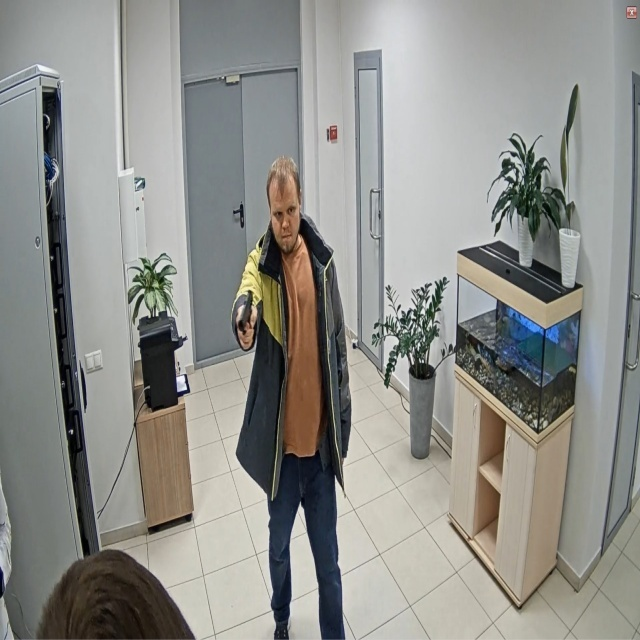

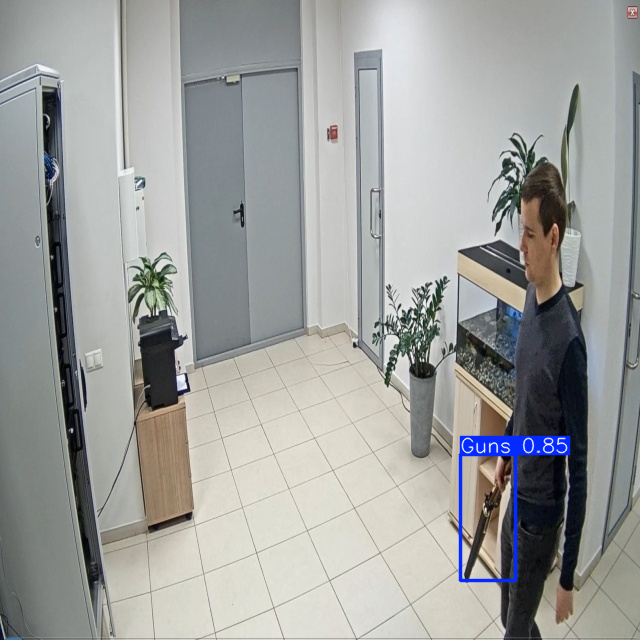

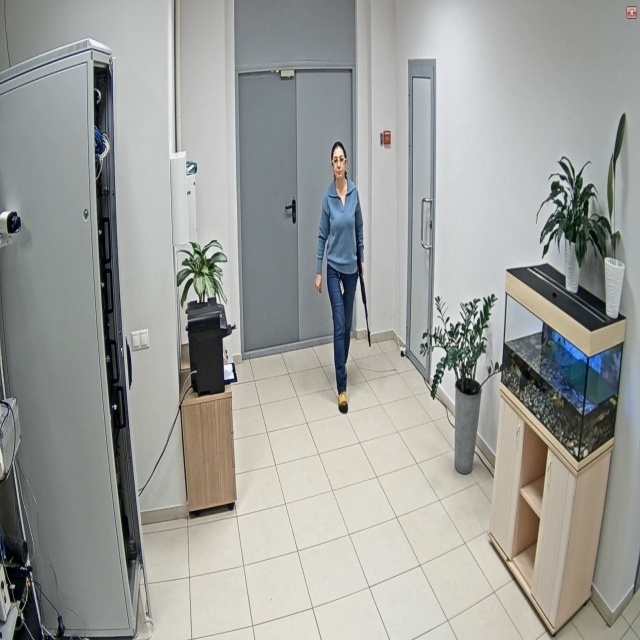

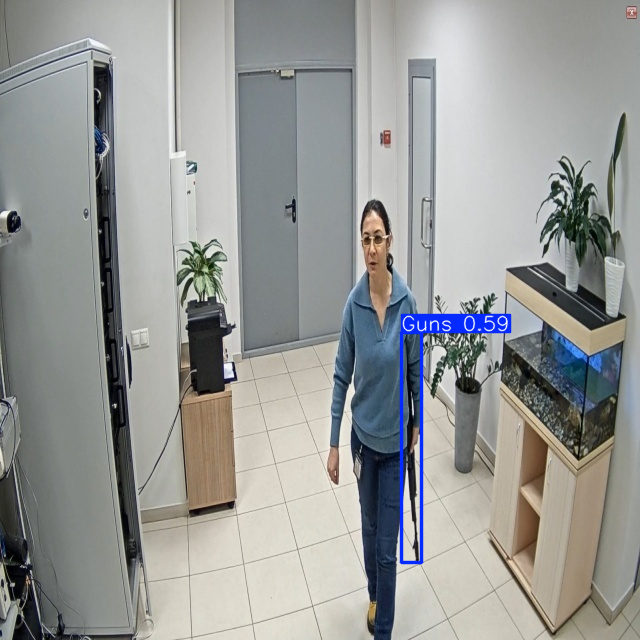

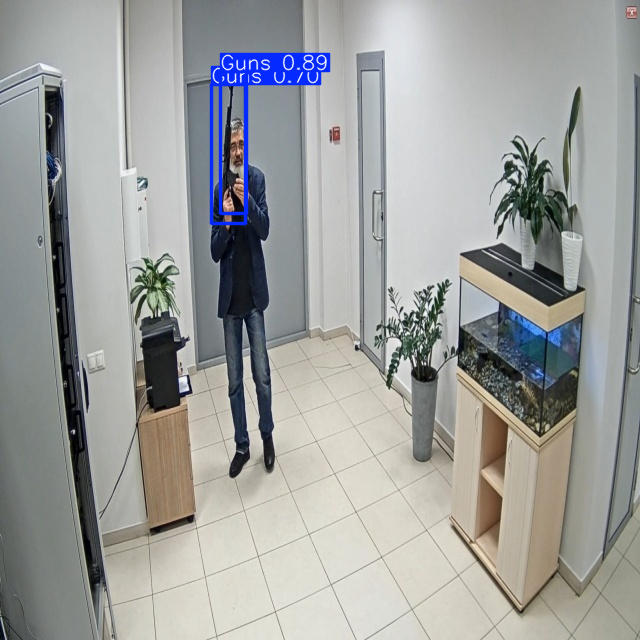

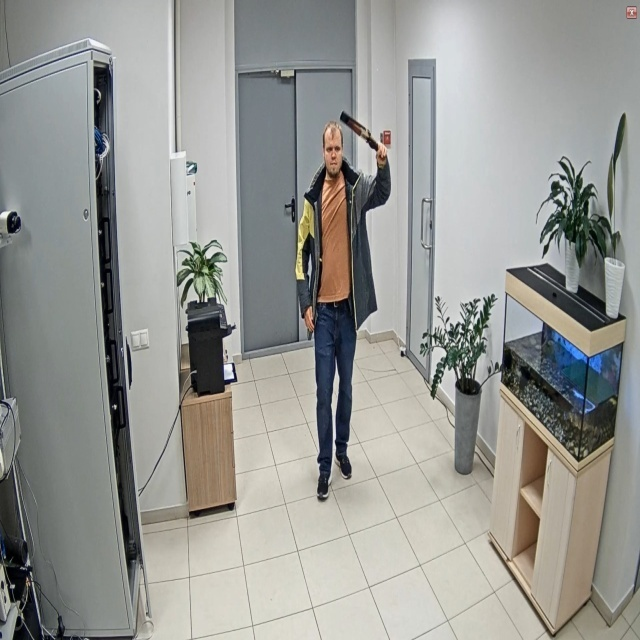

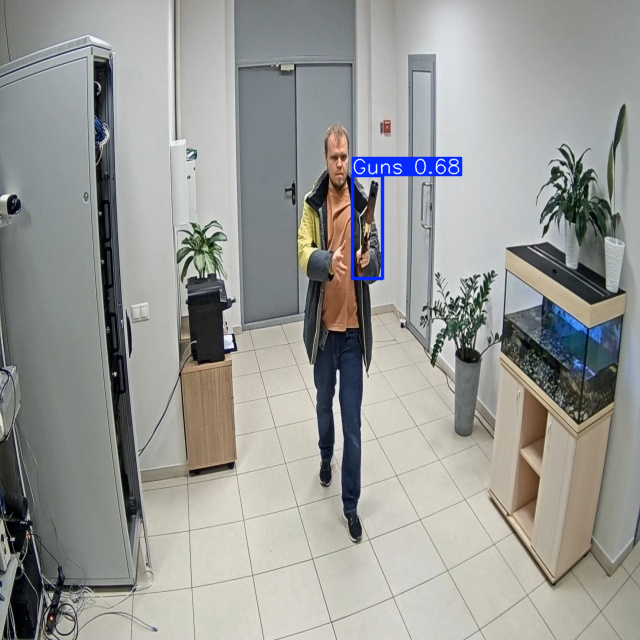

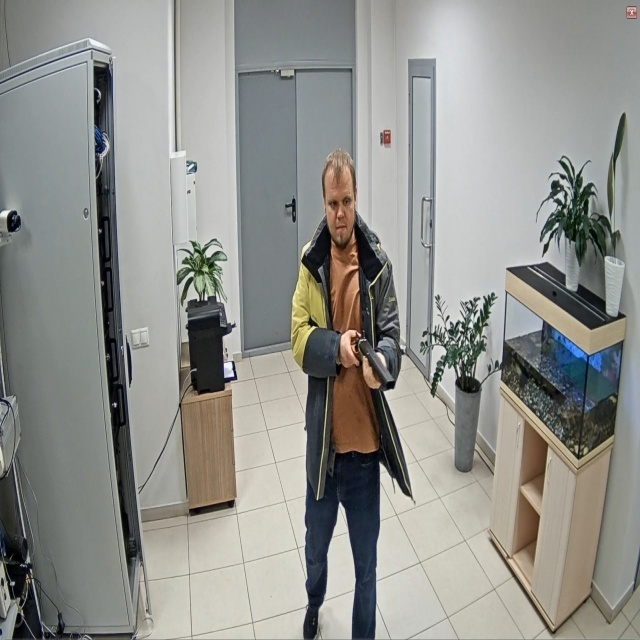

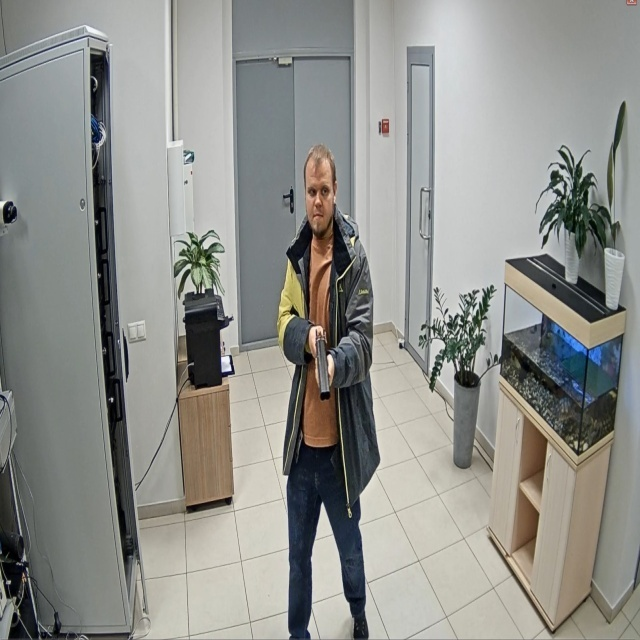

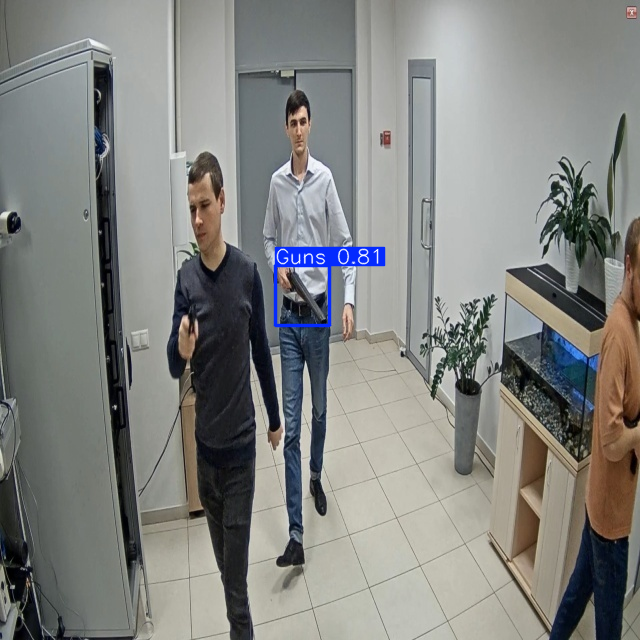

In [42]:
for result in predictions:
    result.show()